# Pymaceuticals Inc. - Capomulin Drug Analysis
---


### Introduction

Pymaceuticals, Inc. has been researching potential anti-cancer medications for Squamous Cell Carcinoma. The drug of interest for the company is Capomulin. The company has funded a mice study comparing Capomulin with other drug treatments.

### The Research Study

The study compared Capomulin with a placebo and eight other drug treatments. 248 mice were used in the study and the number of Male (51%) and Female (49%) was evenly split. The bar chart below shows the total number of time points in which the tumour volume of the mice was measured in each drug regimen.

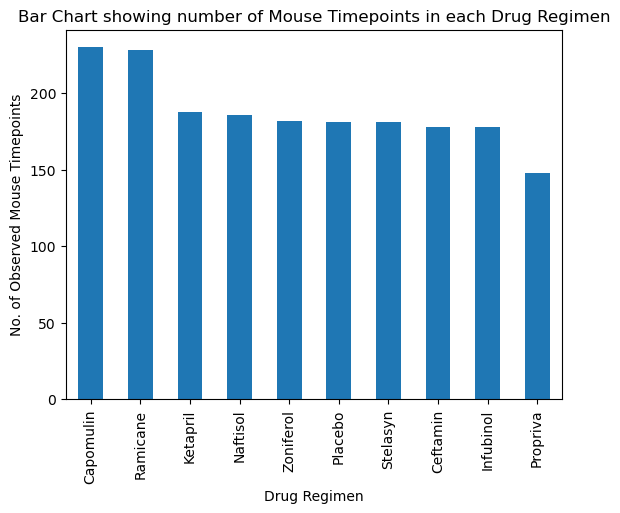

The bar chart shows that there were more time points for Capomulin and Ramicane compared to other drug regimens. This may be because more mice were allocated to these two studies, or these mice were studied for longer. It would be important to understand this difference as this may influence the outcome of results, and it would not be a fair comparison with the other drug treatments.

### Results

Four drugs were chosen for subanalysis. The box plot below shows the final tumour volume for each of the four drug regimens.

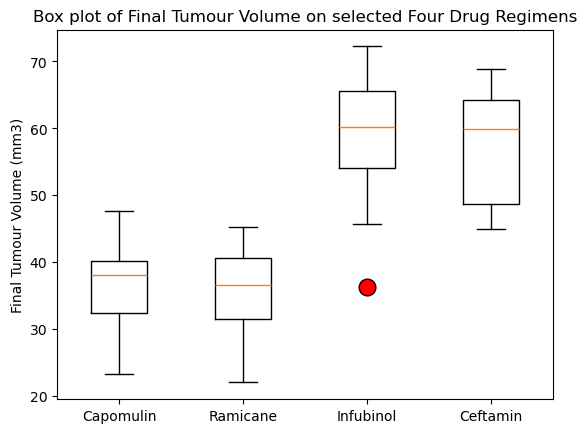

Capomulin and Ramicane both showed smaller final tumour volumes compared to Infubinol and Ceftamin. Interestingly these were the two drugs which had the greater number of time points in the study.  While both these drugs show smaller tumour volumes the efficacy of the drug cannot be inferred as this chart does not show the rate of change of the tumour over time. If we assume that all the tumour volumes were comparable or the same at the start of the study then we can say the drug is effective.

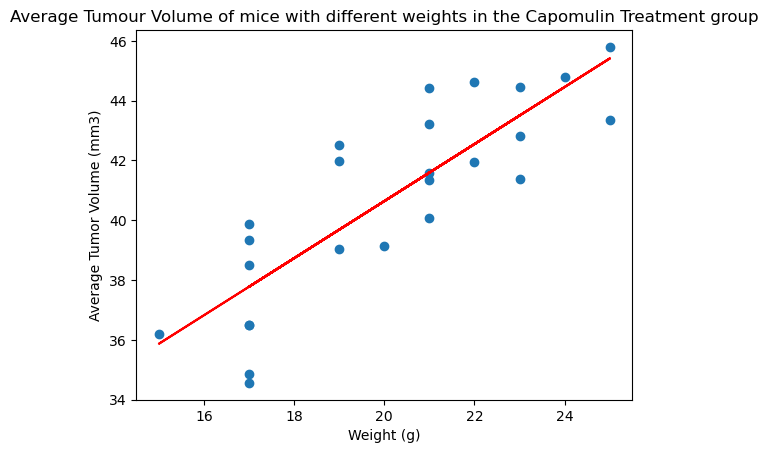

For the Capomulin group, the weight of mice was compared to the average tumour volume. The correlation was found to be strong (r value 0.84). This would be a logical finding as the larger the tumour volume the additional weight would add to the weight of the mouse. 

### Summary

In the limited analysis undertaken both Capomulin and Ramicane, showed lower final tumour volumes compared to Infubinol and Ceftamin. The analysis did not compare the other drug regimens nor with the placebo data.

To better understand the efficacy of Capomulin the drug must be compared to placebo data and the rate of change of the tumour over time should also be analysed. 

--- 

### Data Preperation

In [437]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
combined_df.head()

# NOTE: The output dataframe differs from the assigment output as the dataframe has been deiberately merged in reverse.
# Having the Mouse ID and Drug Regimen to the left of the dataframe makes easier reading and interpretation of the table. 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice.
# The len function has been used here but .nunique can alo be used
num_of_mice = len(combined_df['Mouse ID'].unique())
num_of_mice

249

In [15]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# The duplicate mice is with Mouse ID g989 

duplicated = combined_df[['Mouse ID' , 'Timepoint']].duplicated(keep=False)
combined_df.loc[ duplicated , :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [92]:
# Optional: Get all the data for the duplicate mouse ID.
# We identified that Mouse ID 'g989' has been duplicated 5 times with similar timestamps
combined_df.loc[combined_df['Mouse ID'] == 'g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].ne('g989')]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Checking the number of mice in the clean DataFrame.
# We had removed one Mouse ID in the data cleaning process and hence now have 248 mice data
num_of_mice_clean_df = clean_df['Mouse ID'].nunique()
num_of_mice_clean_df


248

## Summary Statistics

In [20]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [438]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_tumor_volume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance_tumor_volume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std_tumor_volume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_tumor_volume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_summary_df = pd.DataFrame({ 'Mean Tumour Volume' : mean_tumor_volume,
                                 'Median Tumour Volume' : median_tumor_volume,
                                 'Tumour Volume Variance' : variance_tumor_volume,
                                 'Tumour Volume Std. Dev.' : std_tumor_volume,
                                 'Tumour Volume Std. Err.' : sem_tumor_volume })

# Display of the Calculated Drug Summary Table
drug_summary_df

,Mean Tumour Volume,Median Tumour Volume,Tumour Volume Variance,Tumour Volume Std. Dev.,Tumour Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [34]:
# List of Column names in dataframe for quick reference to create charts
clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

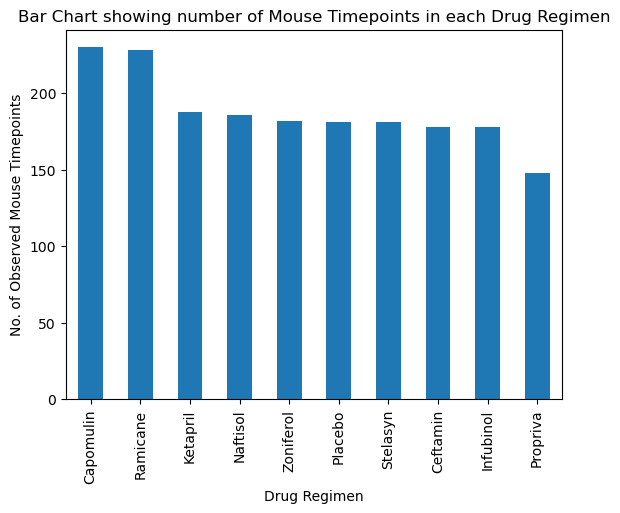

In [399]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
observed_timepoints = clean_df.groupby(['Drug Regimen'])['Timepoint'].count()

# Sorting values by desending
observed_timepoints = observed_timepoints.sort_values(ascending=False)

# Lavbelling of Y axis and Title for clarity
plt.ylabel("No. of Observed Mouse Timepoints")
plt.title("Bar Chart showing number of Mouse Timepoints in each Drug Regimen")

# Display of Bar Chart, suppressing addtional info using ';'
observed_timepoints.plot.bar();

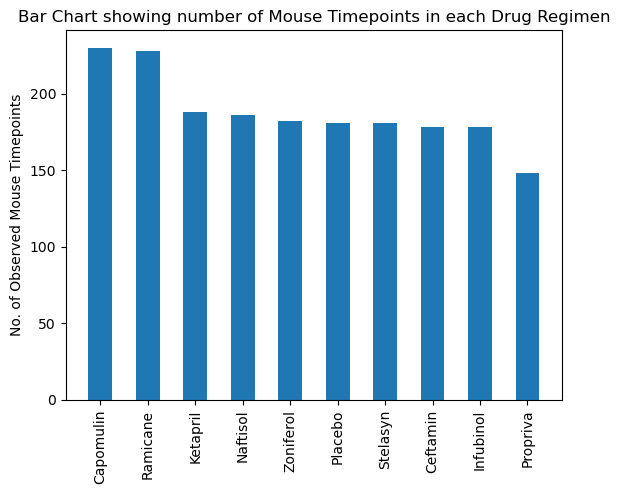

In [436]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
observed_timepoints = clean_df.groupby(['Drug Regimen'])['Timepoint'].count()

# Sorting values by desending
observed_timepoints = observed_timepoints.sort_values(ascending=False)

# Creating an array for number of bars
xbar = np.arange(len(observed_timepoints))

# Creating label list - drug regimens for x-axis
xbar_drug_regimens = [drug for drug, tp in observed_timepoints.items()]

# Labelling of Y axis and Title for clarity
plt.ylabel("No. of Observed Mouse Timepoints")
plt.title("Bar Chart showing number of Mouse Timepoints in each Drug Regimen")

# Tick locations and X axis labelling 
tick_loc = [t for t in xbar]
plt.xticks(tick_loc, xbar_drug_regimens, rotation=90 )

# Plotting of Bar Chart, suppressing addtional info using ';'
plt.bar(xbar, observed_timepoints, width=0.5);
plt.show()

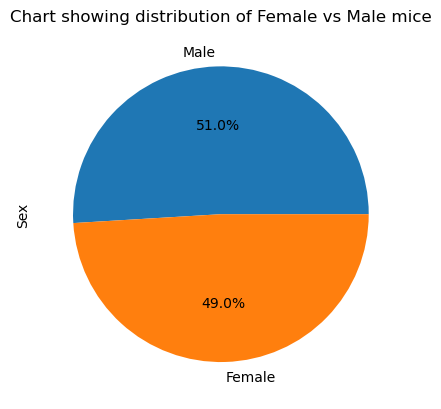

In [397]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Filtering dataframe for the data to plot
sex_of_mice = clean_df['Sex'].value_counts()

# Plottiong of the chart using Pandas
sex_of_mice.plot.pie(autopct="%1.1f%%");

# Formatting and displaying the chart
plt.title("Chart showing distribution of Female vs Male mice")
plt.ylabel("Sex")
plt.show()

In [80]:
# Display the series and its order to help with labeling 
sex_of_mice

Sex
Male      958
Female    922
Name: count, dtype: int64

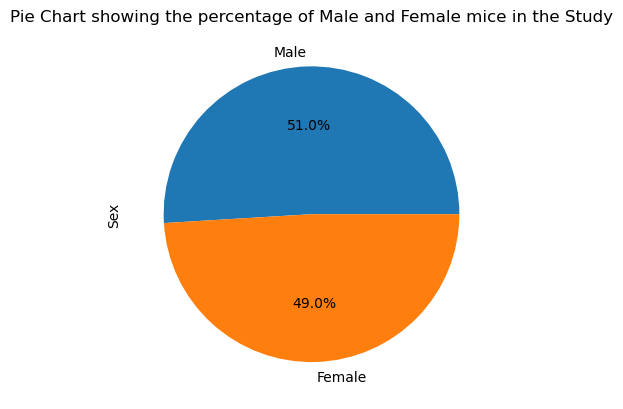

In [396]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Plottiong of the chart ysing pyplot
plt.pie(sex_of_mice, autopct="%1.1f%%", labels=['Male' , 'Female'])

# Formatting and displaying the chart
plt.title("Pie Chart showing the percentage of Male and Female mice in the Study")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [93]:
# Listing out all the columns in the Clean_df Data Frame for reference
clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [387]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Creating of a new dataframe with the selcted 4 drug regimens
final_4_regimens_df = clean_df.loc[(clean_df['Drug Regimen']=='Capomulin') | 
                                   (clean_df['Drug Regimen']=='Ramicane') |
                                   (clean_df['Drug Regimen']=='Infubinol') |
                                   (clean_df['Drug Regimen']=='Ceftamin')]
                                           
final_4_regimens_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [136]:
# We are trying to establish if all the mice have all the same number of time stamps to be able to find the last timepoint
final_4_regimens_df.loc[final_4_regimens_df['Timepoint'] == 0].count()

Mouse ID              100
Drug Regimen          100
Sex                   100
Age_months            100
Weight (g)            100
Timepoint             100
Tumor Volume (mm3)    100
Metastatic Sites      100
dtype: int64

In [142]:
# At Timepoint '0' there are 100 values but at timepoint '45' there are only 63 values, this brief test shows that not all mice have the same number of timepoints
# and we cannot use the largest timepoint in the dataframe for all mice, instead we will have to work out the max timepoint for each mice.
final_4_regimens_df.loc[final_4_regimens_df['Timepoint'] == 45].count()

Mouse ID              63
Drug Regimen          63
Sex                   63
Age_months            63
Weight (g)            63
Timepoint             63
Tumor Volume (mm3)    63
Metastatic Sites      63
dtype: int64

In [211]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_by_mice = final_4_regimens_df.groupby(['Mouse ID'], as_index =False)['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumour_vol_at_max_timepoint = pd.merge(max_timepoint_by_mice, clean_df)
tumour_vol_at_max_timepoint.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [392]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
list_of_max_tvol_by_drug = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Determine outliers using upper and lower bounds

# This For Loop will create a nested list with the 4 selected drug regimens and their respective mice with max weights
for drug_name in treatment_names:
    
    # Temp blacnk list variable to assit making of nested variable
    tvol_append_list = []
    
    # For Loop with conditional to create nested list drug name followed by all the max tumour volumes
    for n in range(0,len(tumour_vol_at_max_timepoint)):
        
        # Conditional to select max tumour volumes for each drug regimen
        if tumour_vol_at_max_timepoint.iloc[n,2] == drug_name:
            max_tvol = tumour_vol_at_max_timepoint.iloc[n,6]
            tvol_append_list.append(max_tvol)
            
    # Creating of the nested list
    list_of_max_tvol_by_drug.append([drug_name, tvol_append_list])
        
    
# Calculation of the Outliers
# Looping through each drug regimen to check for outliers
for drug in range(0,len(treatment_names)):
    
    # To determine the outliers the upper and lower whiskers of a box plot will need to be calcualted.
    # This can be done by manual calculation using the .quartile fucntion.
    # However in this example we have use the box plot itself to extract the upper and lower whiskers.

    # Creating the list of values to be plotted for drug regimen
    box_plot_val = list_of_max_tvol_by_drug[drug][1]

    # Working out the plot but not displaying the plot as it will be used to calcuate the whisker points.
    b_plot = plt.boxplot(box_plot_val)
    plt.close()

    # Calculation of the upper and lower whister points using the .get_ydata function.
    # This function extracts the upper and lower limit whisker points form the y values of the box plot.
    upper_limit = [item.get_ydata()[1] for item in b_plot['whiskers']][1]
    lower_limit = [item.get_ydata()[1] for item in b_plot['whiskers']][0]
    
    # Calcultion and creating a list of the outliers using a list comprehension
    outliers = [y for y in box_plot_val if y < lower_limit or y > upper_limit]

    # Printing out of the outliers for each drug regimen
    print(f"{list_of_max_tvol_by_drug[drug][0]}'s potential outliers are: {outliers}")   

    # NOTE: The output for this exercise does not exactly match the one provided in the assigment.
    # However it shows the required information in a list.
    


Capomulin's potential outliers are: []
Ramicane's potential outliers are: []
Infubinol's potential outliers are: [36.3213458]
Ceftamin's potential outliers are: []


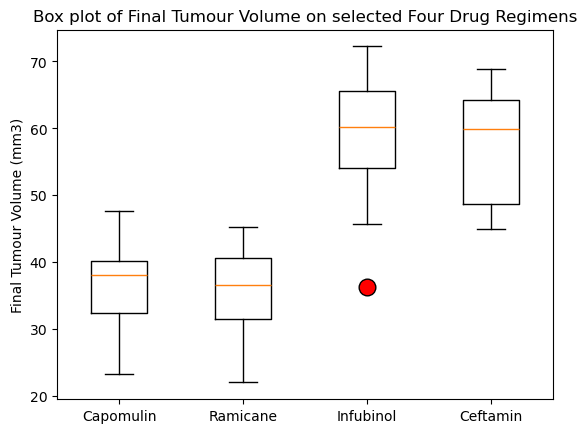

In [439]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# To show all the multiple box plots in the same figure I have used a simpler method of grouping each drug treatment values to a nest table.
# There is the option of using the .subplots function within matplotlib.
# A For loop was used to refine the values from the previous nested list, so it can be easily plotted.
four_b_plots = []
for n in range(0,len(treatment_names)):    
    four_b_plots = four_b_plots + [list_of_max_tvol_by_drug[n][1]]

# Formatting of chart
plt.title("Box plot of Final Tumour Volume on selected Four Drug Regimens")
plt.ylabel("Final Tumour Volume (mm3)")

# Plotting and display of chart
plt.boxplot(four_b_plots, labels=treatment_names, flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'});
plt.show()

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


## Line and Scatter Plots

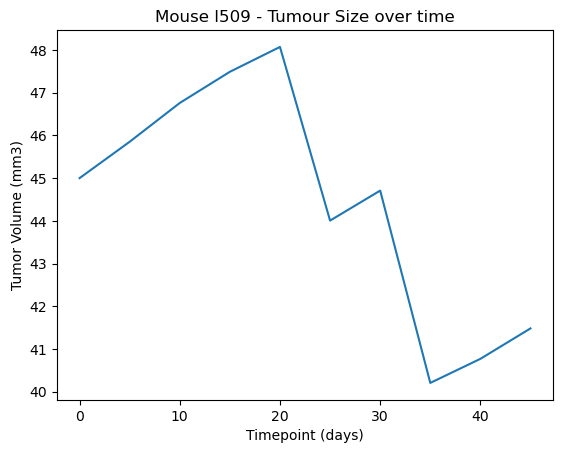

In [384]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filtering the cleaned dataframe for the specific Mouse ID
mouse_l509 = clean_df.loc[clean_df['Mouse ID'] == 'l509']

# Creating a list of value for the x and y axis to plot
xaxis_l509 = mouse_l509['Timepoint']
yaxis_l509 = mouse_l509['Tumor Volume (mm3)']

# Formatting of the chart
plt.title("Mouse l509 - Tumour Size over time")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Plotting and display of the chart
plt.plot(xaxis_l509, yaxis_l509);
plt.show()

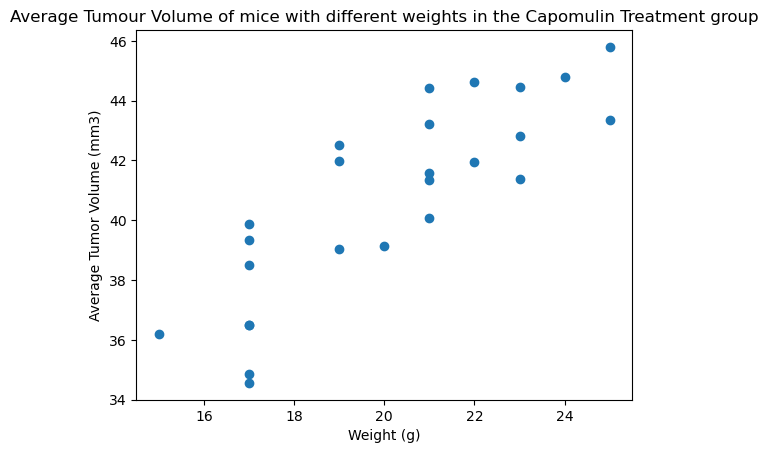

In [382]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filtering the data from the cleaned datafrme to create a Capomulin specific dataframe
capomulin_group = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Grouping and calculation of the average tumour volume
capomulin_df = capomulin_group.groupby(['Mouse ID', 'Weight (g)'], as_index =False)['Tumor Volume (mm3)'].mean()

# Renaming the column
capomulin_df.rename(columns={'Tumor Volume (mm3)' : 'Average Tumor Volume (mm3)'}, inplace=True)

# Creating the list of values for both the x and y axis of the scatter plot
xaxis_capomulin_weight = capomulin_df['Weight (g)']
yaxis_capomulin_avg_tvol = capomulin_df['Average Tumor Volume (mm3)']

# Formatting the chart
plt.title("Average Tumour Volume of mice with different weights in the Capomulin Treatment group")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Plotting & displaying the chart
plt.scatter(xaxis_capomulin_weight, yaxis_capomulin_avg_tvol)
plt.show()

## Correlation and Regression

The correlation coefficient between weight and the average tumor volume is 0.84


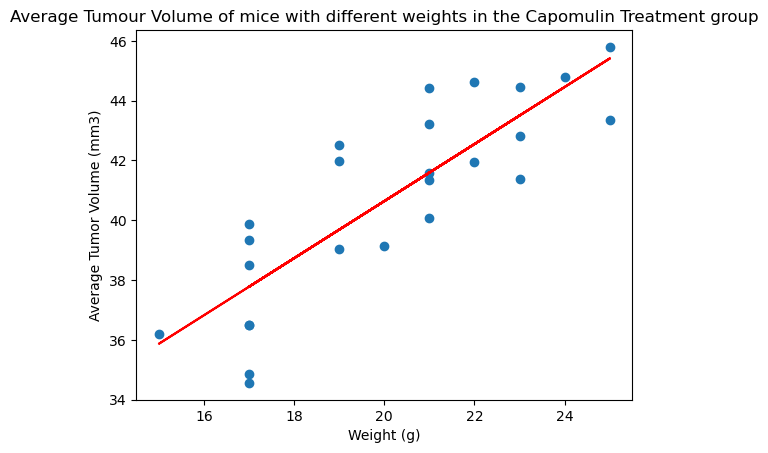

In [380]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculation & display of the Correlation Cofficient using scipy .pearsonr function
print(f"The correlation coefficient between weight and the average tumor volume is {round(st.pearsonr(xaxis_capomulin_weight,yaxis_capomulin_avg_tvol)[0],2)}")

# Linear Regression Model was generated using y = mx + c where 'm = the gradient' and 'c (constant) = intercept'
# m and c values were obtained using the polyfit fucntion from numpy module. 
m, c = np.polyfit(xaxis_capomulin_weight, yaxis_capomulin_avg_tvol, 1)
plt.plot(xaxis_capomulin_weight, m*xaxis_capomulin_weight + c, color='red')
plt.scatter(xaxis_capomulin_weight, yaxis_capomulin_avg_tvol)

# Formatting of the chart
plt.title("Average Tumour Volume of mice with different weights in the Capomulin Treatment group")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display of the chart
plt.show()